In [50]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import numpy 
import csv
import os
#import geopandas as gpd
#from geopandas import read_file


In [51]:
folder_path = "/home/bruut/Desktop/Test_dump/python_learn/python/work_i/assignment2.csv"
dataframe = pd.read_csv(folder_path)
print(dataframe.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [52]:
num_rows = len(dataframe)
num_cols = len(dataframe.columns)

print("number of rows:", num_rows)
print("number of columns", num_cols)

number of rows: 2121
number of columns 21


In [53]:
try:
  # Read the first row only (assuming headers are in the first row)
  df = pd.read_csv(folder_path, nrows=1)
except FileNotFoundError:
  print("Error: File not found!")
  exit()

# Get column names (assuming headers are in the first row)
column_headers = df.columns.tolist()

print("Column Headers:", column_headers)
dataframe.head()


Column Headers: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


We begin the Adsignment questions 

Analyse the correlation between discount, profit and sales. Create a correlation heatmap to visualise this relationship. 

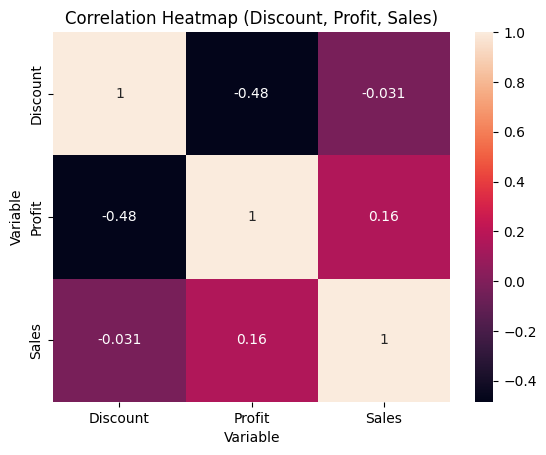

In [54]:
folder_path = "/home/bruut/Desktop/Test_dump/python_learn/python/work_i/assignment2.csv"
dataframe = pd.read_csv(folder_path)
choosen_col = ['Discount', 'Profit', 'Sales']


data_corr = dataframe[choosen_col]
correlation = data_corr.corr()

sns.heatmap(correlation, annot=True)

plt.title("Correlation Heatmap (Discount, Profit, Sales)")
plt.xlabel("Variable")
plt.ylabel("Variable")

# Display the heatmap
plt.show()

Identify the top 10 selling products in terms of sales with visualisation. 

In [55]:
# Product Names
for product_name in dataframe['Product Name'].unique():
  print(product_name)

Bush Somerset Collection Bookcase
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back
Bretford CR4500 Series Slim Rectangular Table
Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood
Chromcraft Rectangular Conference Tables
Global Deluxe Stacking Chair, Gray
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish
Howard Miller 13-3/4" Diameter Brushed Chrome Round Wall Clock
Electrix Architect's Clamp-On Swing Arm Lamp, Black
Atlantic Metals Mobile 3-Shelf Bookcases, Custom Colors
Global Fabric Manager's Chair, Dark Gray
Longer-Life Soft White Bulbs
Global Leather Task Chair, Black
Novimex Turbo Task Chair
Luxo Economy Swing Arm Lamp
Global Value Mid-Back Manager's Chair, Gray
High-Back Leather Manager's Chair
Tenex Traditional Chairmats for Medium Pile Carpet, Standard Lip, 36" x 48"
6" Cubicle Wall Clock, Black
Eldon Expressions Desk Accessory, Wood Pencil Holder, Oak
Novimex Swivel Fabric Task Chair
Seth Thomas 13 1/2" Wall Clock
9-3/4 Diameter Round Wall

Number of Products Recorded: 380


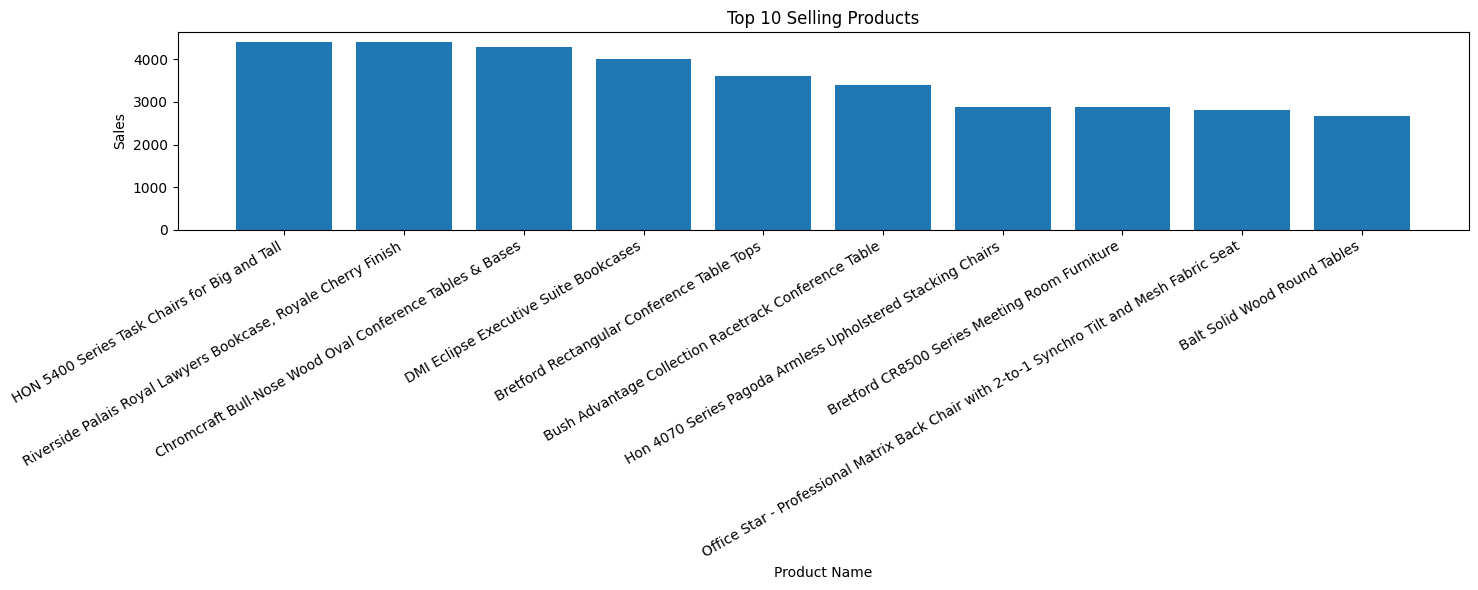

In [56]:
number_of_products = dataframe['Product Name'].nunique()

print(f"Number of Products Recorded: {number_of_products}")

top_10_products = dataframe.sort_values(by='Sales', ascending=False).head(17)

product_names = top_10_products['Product Name'].to_numpy()
sales_values = top_10_products['Sales'].to_numpy()


plt.figure(figsize=(15, 6)) 
plt.bar(product_names, sales_values)
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=30, ha='right')  
plt.tight_layout()

plt.show()


What is the predominant sub-category in terms of sales? 

In [57]:
number_sub_cat = dataframe['Sub-Category'].nunique()
print("Number of categories:",number_sub_cat)

sub_category_counts = dataframe['Sub-Category'].value_counts()
sub_category_counts_sorted = sub_category_counts.sort_values(ascending=False)

predominant_category = sub_category_counts_sorted.index[0]
second_predominant = sub_category_counts_sorted.index[1]
print(f"Predominant Sub-Category: {predominant_category}")
print(f"Second Predominant Sub-Category: {second_predominant}")


Number of categories: 4
Predominant Sub-Category: Furnishings
Second Predominant Sub-Category: Chairs


Compare the sales and profits of different states.

In [58]:
def compare_sales_profit_by_state(filename):
  try:
    dataframe = pd.read_csv(filename)

    if "State" not in dataframe.columns or ("Sales" not in dataframe.columns and "Profit" not in dataframe.columns):
      print("Warning: Missing required columns ('State', 'Sales' or 'Profit').")
      return None

    grouped_by_state = dataframe.groupby('State')[["Sales", "Profit"]].sum()

    sales_stats = grouped_by_state['Sales'].describe()
    profit_stats = grouped_by_state['Profit'].describe()

    print("Comparison of Sales and Profit by State:")
    print(grouped_by_state.to_string()) 
    print("\nSales Statistics:")
    print(sales_stats)
    print("\nProfit Statistics:")
    print(profit_stats)

  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
filename = folder_path
compare_sales_profit_by_state(filename)

num_states = dataframe['State'].nunique()
print(f"number of states: {num_states}")


Comparison of Sales and Profit by State:
                            Sales      Profit
State                                        
Alabama                 5786.6000   1231.3882
Arizona                11727.6430  -2744.9228
Arkansas                3148.9500    781.4552
California            150184.7855   9162.9656
Colorado               13227.8050  -2683.1342
Connecticut             5147.5270   1226.2805
Delaware                4313.7860    870.7072
District of Columbia    1308.9000    350.0835
Florida                21561.4480  -2254.9807
Georgia                 7551.3000   2049.4580
Idaho                   2553.5220    533.9665
Illinois               26984.2720  -9076.2894
Indiana                11496.7100   2181.2753
Iowa                    2642.3100    520.0385
Kansas                   111.1200     36.9696
Kentucky               11986.0300   3210.9932
Louisiana               2963.0300    685.9946
Maine                      0.0000     33.9388
Maryland                8622.2930   190

Investigate the relationship between Discount and Profit. Create a scatter plot to visualise this relationship

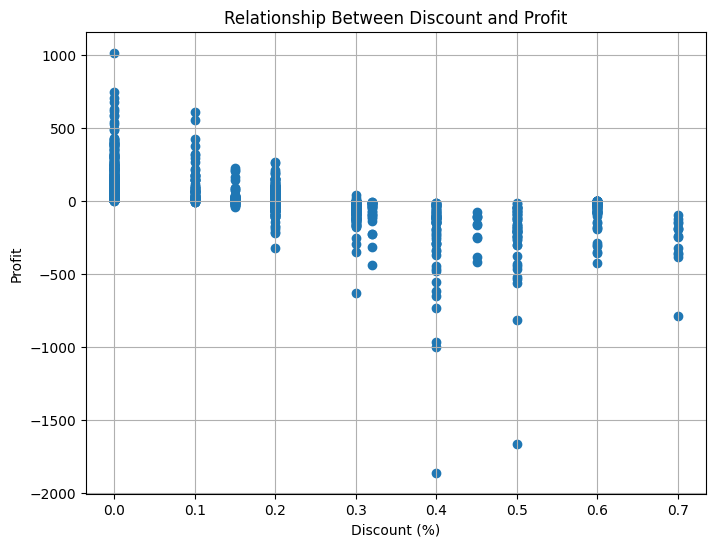

In [59]:

def analyze_discount_profit(filename):
  try:
    dataframe = pd.read_csv(filename)

    if "Discount" not in dataframe.columns or "Profit" not in dataframe.columns:
      print("Warning: Missing required columns ('Discount', 'Profit').")
      return None

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(dataframe["Discount"], dataframe["Profit"])
    plt.xlabel("Discount (%)")
    plt.ylabel("Profit")
    plt.title("Relationship Between Discount and Profit")
    plt.grid(True) 
    plt.show()
  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")

# Assuming your CSV file is named "sales_data.csv"
filename = folder_path
analyze_discount_profit(filename)
    


Analyse the frequency of orders by individual customers to identify loyal customers


In [60]:
def identify_loyal_customers(filename):
  try:
    dataframe = pd.read_csv(filename)
    if "Customer Name" not in dataframe.columns or "Order Date" not in dataframe.columns:
      print("Warning: Missing required columns ('Customer Name', 'Order Date').")
      return

    customer_orders = dataframe.groupby('Customer Name')['Order Date'].count()

    loyalty_threshold = 8
    loyal_customers = customer_orders[customer_orders >= loyalty_threshold]

    print("Loyal Customers (with at least", loyalty_threshold, "orders):")
    for name, count in loyal_customers.items():
      print(f"{count} - {name}")

  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")

filename = folder_path
identify_loyal_customers(filename)


Loyal Customers (with at least 8 orders):
8 - Anna Andreadi
8 - Anne McFarland
8 - Arthur Gainer
9 - Caroline Jumper
8 - George Bell
9 - Joel Eaton
8 - John Lee
8 - Justin Deggeller
9 - Kelly Lampkin
8 - Laura Armstrong
9 - Lena Creighton
8 - Mike Pelletier
8 - Paul Prost
8 - Sanjit Chand
15 - Seth Vernon
8 - Zuschuss Carroll


Identify the top 5 customers based on total sales. Create visualisations that compare these top customers in terms of sales, profit, and discount levels. 

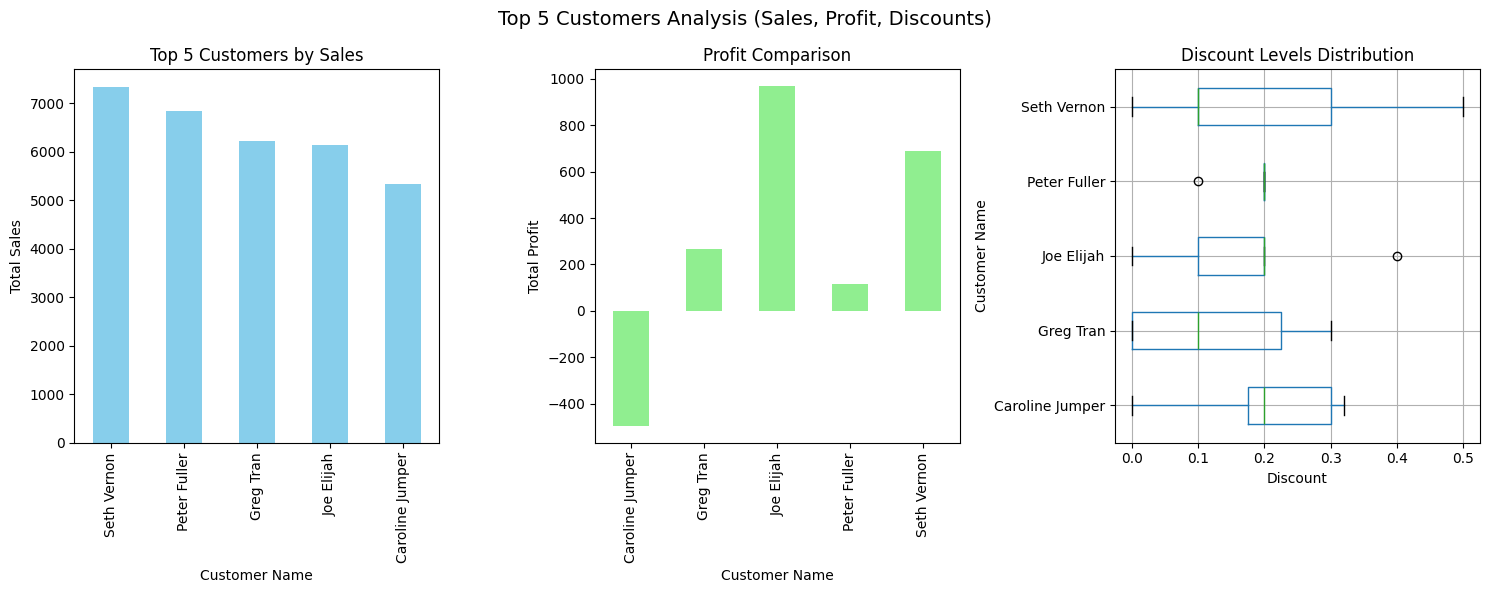

In [61]:
def analyze_top_customers(data_file):


  try:
    data = pd.read_csv(data_file)

    required_cols = ["Customer Name", "Sales", "Profit", "Discount"]
    if not all(col in data.columns for col in required_cols):
      print("Warning: Missing required columns:", ", ".join(required_cols))
      return

    customer_totals = data.groupby("Customer Name")["Sales"].sum()
    top_customers = customer_totals.sort_values(ascending=False).head(5)
    top_data = data[data["Customer Name"].isin(top_customers.index)]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

    # Sales bar chart
    top_customers.plot(kind="bar", color="skyblue", ax=ax1, legend=False)
    ax1.set_xlabel("Customer Name")
    ax1.set_ylabel("Total Sales")
    ax1.set_title("Top 5 Customers by Sales")

    # Profit bar chart
    top_data.groupby("Customer Name")["Profit"].sum().plot(kind="bar", color="lightgreen", ax=ax2, legend=False)
    ax2.set_xlabel("Customer Name")
    ax2.set_ylabel("Total Profit")
    ax2.set_title("Profit Comparison")

    # Discount levels boxplot
    top_data.boxplot(column="Discount", by="Customer Name", vert=False, ax=ax3)
    ax3.set_xlabel("Discount")
    ax3.set_ylabel("Customer Name")
    ax3.set_title("Discount Levels Distribution")

    plt.suptitle("Top 5 Customers Analysis (Sales, Profit, Discounts)", fontsize=14)
    plt.tight_layout()
    plt.show()

  except FileNotFoundError:
    print("Error: File not found. Check data file path.")

data_file = folder_path
analyze_top_customers(data_file)


Investigate the distribution of different ship modes

Ship Mode Distribution:
Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64


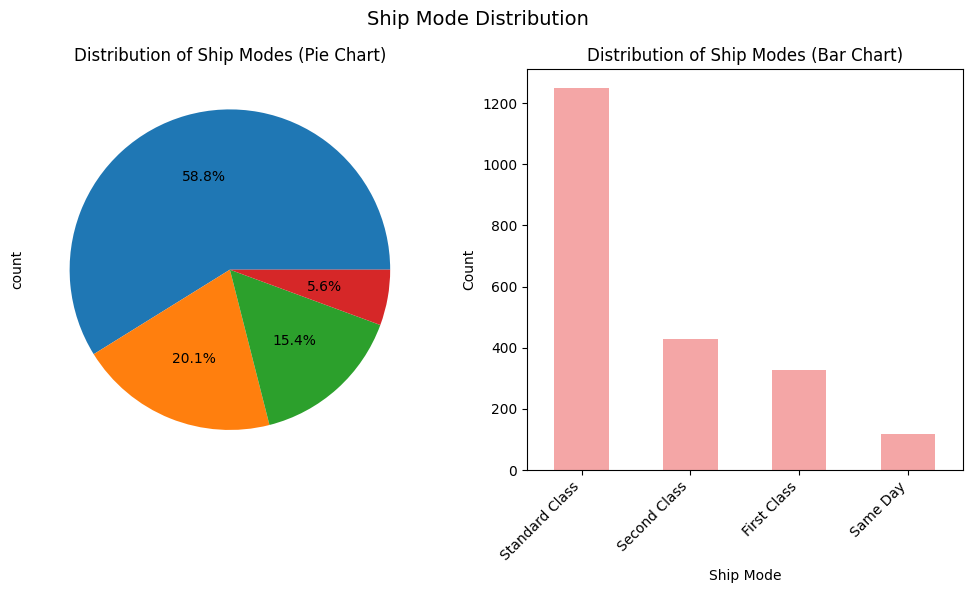

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_ship_modes(data_file):
  """
  Analyzes the distribution of different ship modes in a data set and presents visualizations.

  Args:
      data_file: Path to the CSV file containing data with a "Ship Mode" column.
  """

  try:
    data = pd.read_csv(data_file)
    if "Ship Mode" not in data.columns:
      print("Warning: Missing required column 'Ship Mode'.")
      return

    ship_mode_counts = data["Ship Mode"].value_counts()
    print("Ship Mode Distribution:")
    print(ship_mode_counts)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    # Pie chart
    ship_mode_counts.plot(kind="pie", autopct="%1.1f%%", labels=None, ax=ax1)
    ax1.set_title("Distribution of Ship Modes (Pie Chart)")

    # Bar chart
    ship_mode_counts.plot(kind="bar", color='lightcoral', alpha=0.7, ax=ax2)
    ax2.set_title("Distribution of Ship Modes (Bar Chart)")
    ax2.set_xlabel("Ship Mode")
    ax2.set_ylabel("Count")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

    # Adjust layout
    plt.suptitle("Ship Mode Distribution", fontsize=14)
    plt.tight_layout()
    plt.show()

  except FileNotFoundError:
    print("Error: File not found. Check data file path.")

data_file = folder_path
analyze_ship_modes(data_file)


Analyse the trend of total sales and profits over time.

Earliest Order Date: 2014-01-06 00:00:00
Latest Ship Date: 2018-01-05 00:00:00
Number of Products: 380


/tmp/ipykernel_43564/3766898903.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataframe_resampled = dataframe.resample("M", on=date_col)[["Sales", "Profit"]].sum()


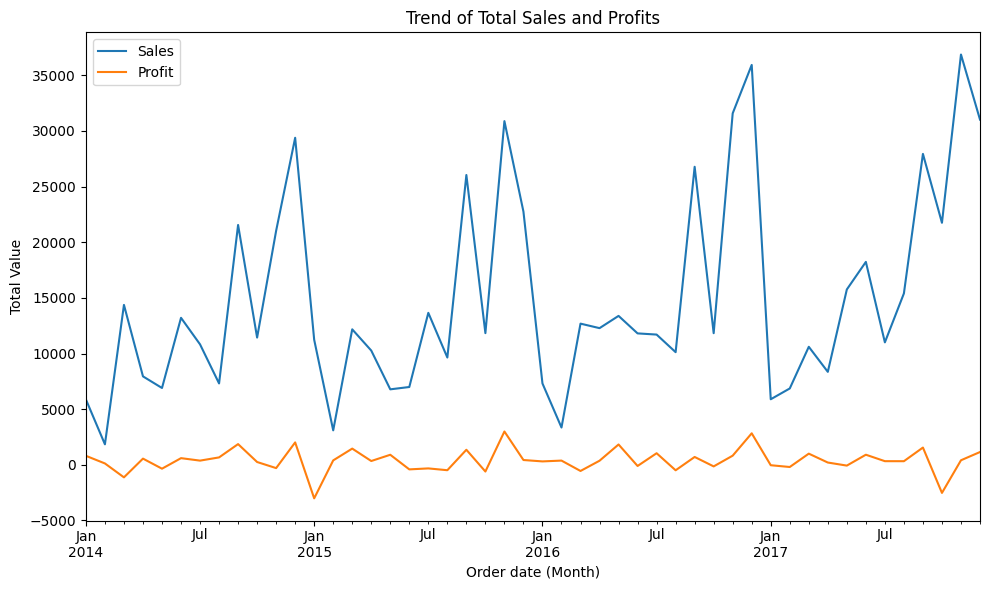

In [63]:
# to see how lont the company has been running
def process_csv(filename):
  try:

    dataframe = pd.read_csv(filename)

    new_column_names = {
        'Order Date': 'OrderDate',
        'Ship Date': 'ShipDate',
        'Product Name': 'ProductName',
        'Product Id': 'ProductId'
    }

    # Check for missing renaming columns (optional)
    if not set(new_column_names.keys()).issubset(dataframe.columns):
        print("Warning: Some columns for renaming might be missing in the CSV.")

    dataframe["OrderDate"] = pd.to_datetime(dataframe["Order Date"], format="%m/%d/%Y")
    dataframe["ShipDate"] = pd.to_datetime(dataframe["Ship Date"], format="%m/%d/%Y")
    dataframe["ProductName"] = dataframe["Product Name"]  # Assuming "Product Name" is a string column

    # Optional renaming
    # dataframe = dataframe.rename(columns=new_column_names)

    earliest_order = dataframe['OrderDate'].min()
    latest_ship = dataframe['ShipDate'].max()
    num_products = dataframe['ProductName'].nunique()

    print(f"Earliest Order Date: {earliest_order}")
    print(f"Latest Ship Date: {latest_ship}")
    print(f"Number of Products: {num_products}")

  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")

filename = folder_path
process_csv(filename)



# To check analyse the total sales and profit over time 
def process_csv(filename):
  try:
    dataframe = pd.read_csv(filename)

    if "Order Date" not in dataframe.columns:
      print("Warning: 'Order Date' column not found in CSV.")
      return None 

    dataframe["Order Date"] = pd.to_datetime(dataframe["Order Date"], format="%m/%d/%Y")

    return dataframe

  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
    return None  

filename = folder_path
dataframe = process_csv(filename)
if dataframe is not None:
  date_col = "Order Date"

  try:
    dataframe_resampled = dataframe.resample("M", on=date_col)[["Sales", "Profit"]].sum()
    dataframe_resampled.plot(kind="line", figsize=(10, 6))
    plt.xlabel(f"{date_col.capitalize()} (Month)")
    plt.ylabel("Total Value")
    plt.title("Trend of Total Sales and Profits")
    plt.legend()  
    plt.tight_layout()
    plt.show()

  except KeyError:
    print("Warning: 'Sales' or 'Profit' columns not found in CSV.")

else:
  print("Error: Failed to process CSV file. Please check for issues.")


Create a map to visualise sales and profit distributions by state.

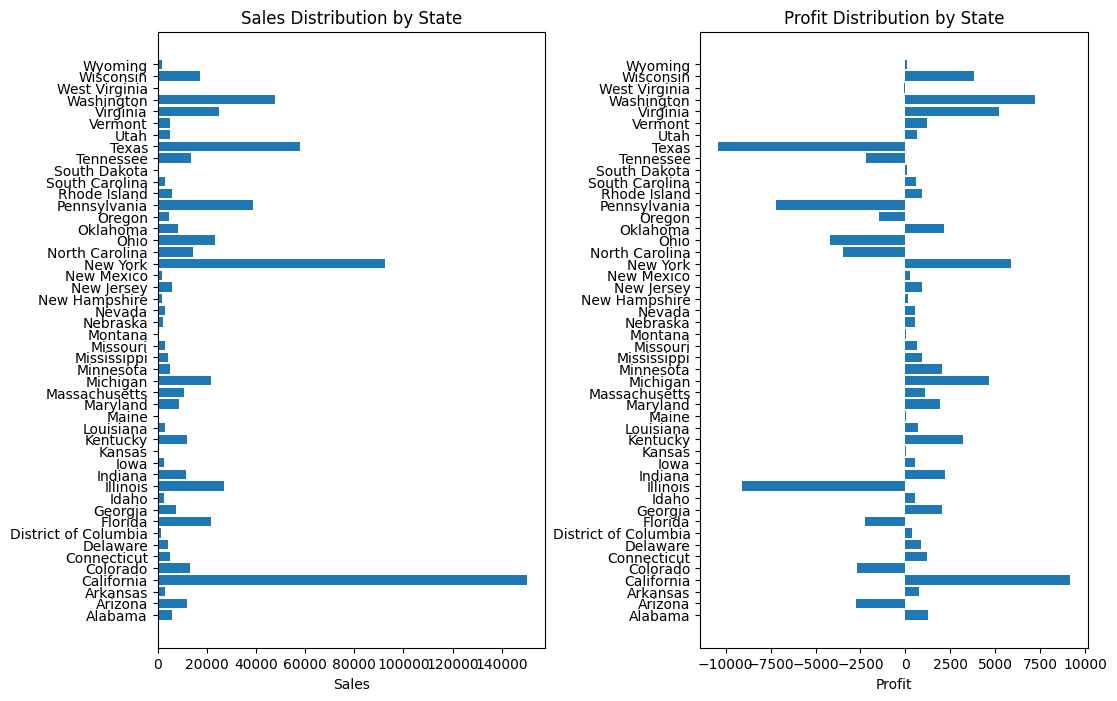

In [66]:
folder_path = "/home/bruut/Desktop/Test_dump/python_learn/python/work_i"

# Construct the file path
file_path = os.path.join(folder_path, "assignment2.csv")

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Group the data by 'State' and calculate the sum of 'Sales' and 'Profit' for each state
sales_by_state = data.groupby('State')['Sales'].sum().reset_index()
profit_by_state = data.groupby('State')['Profit'].sum().reset_index()

# Set figure size
plt.figure(figsize=(12, 8))

# Create a subplot for sales distribution
plt.subplot(1, 2, 1)
plt.barh(sales_by_state['State'], sales_by_state['Sales'])
plt.xlabel('Sales')
plt.title('Sales Distribution by State')

# Create a subplot for profit distribution
plt.subplot(1, 2, 2)
plt.barh(profit_by_state['State'], profit_by_state['Profit'])
plt.xlabel('Profit')
plt.title('Profit Distribution by State')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

To see how much profit and loss was made in each state

In [67]:
import pandas as pd
import os

# Replace with the correct folder path
folder_path = "/home/bruut/Desktop/Test_dump/python_learn/python/work_i"

# Construct the file path
file_path = os.path.join(folder_path, "assignment2.csv")

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Group the data by 'State' and calculate the sum of 'Profit' for each state
profit_by_state = data.groupby('State')['Profit'].sum().reset_index()

# Identify states with positive profit (profit) and negative profit (loss)
profit_states = profit_by_state[profit_by_state['Profit'] > 0]
loss_states = profit_by_state[profit_by_state['Profit'] < 0]

# Print the states with profit
print("States with Profit:")
print(profit_states)

# Print the states with loss
print("\nStates with Loss:")
print(loss_states)

States with Profit:
                   State     Profit
0                Alabama  1231.3882
2               Arkansas   781.4552
3             California  9162.9656
5            Connecticut  1226.2805
6               Delaware   870.7072
7   District of Columbia   350.0835
9                Georgia  2049.4580
10                 Idaho   533.9665
12               Indiana  2181.2753
13                  Iowa   520.0385
14                Kansas    36.9696
15              Kentucky  3210.9932
16             Louisiana   685.9946
17                 Maine    33.9388
18              Maryland  1905.8274
19         Massachusetts  1090.0727
20              Michigan  4675.5516
21             Minnesota  2023.8871
22           Mississippi   944.8196
23              Missouri   625.2169
24               Montana    21.7532
25              Nebraska   518.4364
26                Nevada   524.5705
27         New Hampshire   153.9370
28            New Jersey   932.3293
29            New Mexico   251.5917
30      

/tmp/ipykernel_43564/238172651.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(profit_by_state['State'], rotation=90, ha='right')


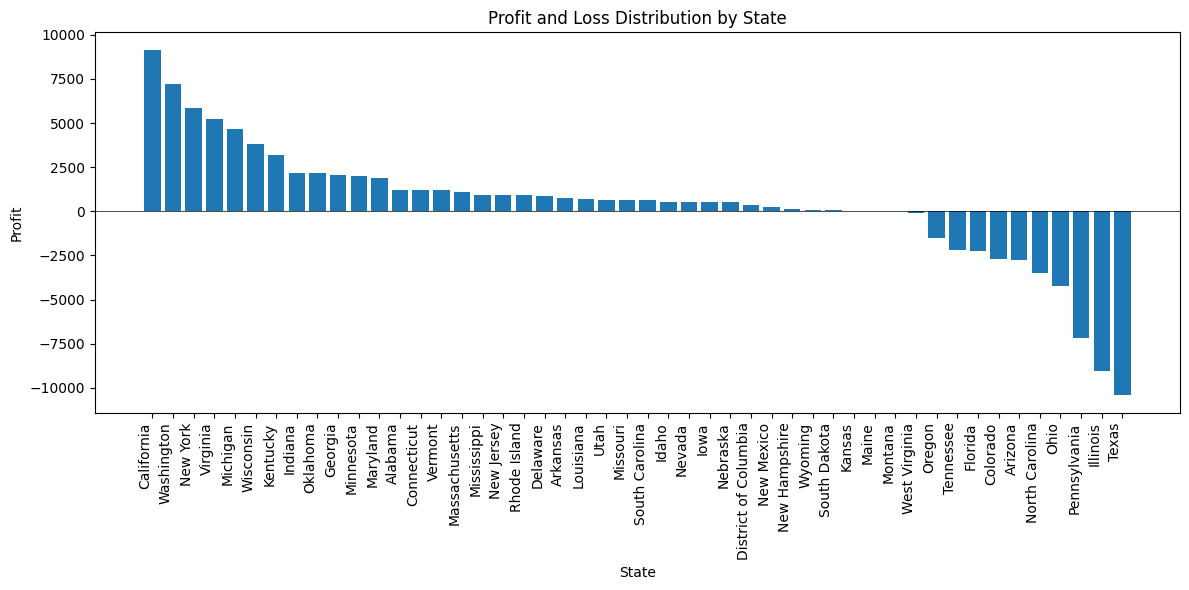

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Replace with the correct folder path
folder_path = "/home/bruut/Desktop/Test_dump/python_learn/python/work_i"

# Construct the file path
file_path = os.path.join(folder_path, "assignment2.csv")

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Group the data by 'State' and calculate the sum of 'Profit' for each state
profit_by_state = data.groupby('State')['Profit'].sum().reset_index()

# Sort the data by 'Profit' in descending order
profit_by_state = profit_by_state.sort_values(by='Profit', ascending=False)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(profit_by_state['State'], profit_by_state['Profit'])

# Set the x-axis ticks and labels
plt.xticks(rotation=90)
ax.set_xticklabels(profit_by_state['State'], rotation=90, ha='right')

# Set the chart title and axis labels
ax.set_title('Profit and Loss Distribution by State')
ax.set_xlabel('State')
ax.set_ylabel('Profit')

# Add a horizontal line at y=0 to separate positive and negative values
ax.axhline(0, color='black', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()